# Day 11: Dumbo Octopus

In [1]:
def load_input(filename):
    result = {}
    with open(filename) as f:
        for y, line in enumerate(f.readlines()):
            for x, c in enumerate(line.strip()):
                result[x, y] = int(c)
    return result, (x+1, y+1)

## Part one

> The energy level of each octopus is a value between 0 and 9. Here, the top-left octopus has an energy level of 5, the bottom-right one has an energy level of 6, and so on.

In [2]:
world, size = load_input('11-sample.txt')
assert size == (10, 10)
assert world[0, 0] == 5
assert world[9, 9] == 6

### Let's see the world

In [3]:
from PIL import Image, ImageDraw

# https://betterfigures.org/2015/06/23/picking-a-colour-scale-for-scientific-graphics/

COLOR_SCALE = [
    '#67001f',
    '#b3172b',
    '#d7604d',
    '#f5a683',
    '#fedcc8',
    '#f9f9f9',
    '#d2e6f1',
    '#93c6e0',
    '#4394c4',
    '#2166ad',
    '#053061',
]

COLOR_SCALE = [
    '#800026',
    '#be0026',
    '#e41a1c',
    '#fd4e2a',
    '#fe8e3c',
    '#ffb34c',
    '#ffda76',
    '#ffeea1',
    '#ffffcd',
    '#FFFFFF',
]

def iter_world(world, size):
    max_x, max_y = size
    for y in range(max_y):
        for x in range(max_x):
            yield x, y, world[x, y]
            

def draw_world(world, size, scale=20):
    max_x, max_y = size
    new_size = (max_x * scale, max_y * scale)
    img = Image.new('RGBA', new_size)
    draw = ImageDraw.Draw(img)
    for (x, y, level) in iter_world(world, size):
        box = (x*scale, y*scale, x*scale+scale-2, y*scale+scale-2)
        color = COLOR_SCALE[level]
        draw.rectangle(box, fill=color)
        if level >= 9:
            draw.point((x * scale + (scale // 2), y * scale + (scale // 2)), (0, 0, 0))
        if scale > 20:
            color = 'black'if level > 4 else 'white'
            pos = (x * scale + scale//10, y * scale + scale//10)
            draw.text(pos, str(level), color)
    return img

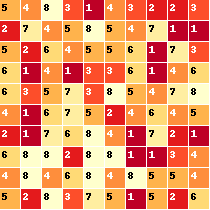

In [4]:
world, size = load_input('11-sample.txt')
draw_world(world, size, scale=21)

> You can model the energy levels and flashes of light in steps. During a single step, the following occurs:

> - First, the energy level of each octopus increases by 1.
> - Then, any octopus with an energy level greater than 9 flashes. This increases the energy level of all adjacent octopuses by 1, including octopuses that are diagonally adjacent. If this causes an octopus to have an energy level greater than 9, it also flashes. This process continues as long as new octopuses keep having their energy level increased beyond 9. (An octopus can only flash at most once per step.)
> - Finally, any octopus that flashed during this step has its energy level set to 0, as it used all of its energy to flash.

In [5]:
def neighbours(world, size, x, y):
    max_x, max_y = size
    for delta_y in (-1, 0, 1):
        pos_y = y + delta_y
        if pos_y < 0 or pos_y >= max_y:
            continue
        for delta_x in (-1, 0, 1):
            pos_x = x + delta_x
            if pos_x < 0 or pos_x >= max_x:
                continue
            if pos_x == x and pos_y == y:
                continue
            yield pos_x, pos_y, world[pos_x, pos_y]
            
world = {
    (0, 0): 0,
    (1, 0): 1,
    (2, 0): 2,
    (0, 1): 3,
    (1, 1): 4,
    (2, 1): 5,
    (0, 2): 6,
    (1, 2): 7,
    (2, 2): 8,
}
size = (3, 3)
assert list(neighbours(world, size, 1, 1)) == [
    (0, 0, 0),
    (1, 0, 1),
    (2, 0, 2),
    (0, 1, 3),
    (2, 1, 5),
    (0, 2, 6),
    (1, 2, 7),
    (2, 2, 8)
]

assert list(neighbours(world, size, 0, 0)) == [(1, 0, 1), (0, 1, 3), (1, 1, 4)]
assert list(neighbours(world, size, 2, 2)) == [(1, 1, 4), (2, 1, 5), (1, 2, 7)]

In [6]:
def step(world, size):
    max_x, max_y = size
    # the energy level of each octopus increases by 1.
    new_world = {
        (x, y): level + 1
        for x, y, level in iter_world(world, size)
    }
    # Any octopus with an energy level greater than 9 flashes.
    already_exploded = set([])
    octopus_to_explode = {
        (x, y)
        for x, y, level in iter_world(new_world, size)
        if level > 9
    }
    while octopus_to_explode:
        (x, y) = octopus_to_explode.pop()
        if (x, y) in already_exploded:
            continue
        for nx, ny, level in neighbours(new_world, size, x, y):
            new_level = level + 1
            new_world[nx, ny] = new_level
            if new_level > 9: # Next to explode
                octopus_to_explode.add((nx, ny))
        already_exploded.add((x, y))
        
    # Finally, any octopus that flashed during this step
    # has its energy level set to 0
    for (x, y) in  already_exploded:   
        new_world[x, y] = 0
    return new_world, len(already_exploded)

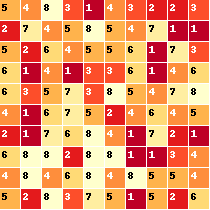

In [7]:
world, size = load_input('11-sample.txt')
draw_world(world, size, scale=21)

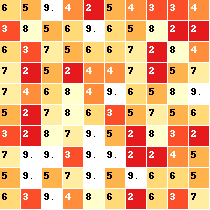

In [8]:
# Step 1
world, num = step(world, size)
assert num == 0
draw_world(world, size, scale=21)

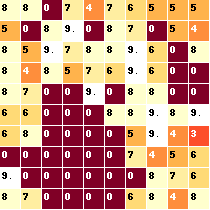

In [9]:
# step 2
world, num = step(world, size)
assert num == 35
draw_world(world, size, scale=21)

45


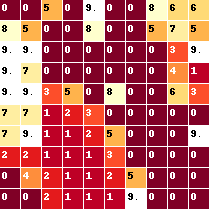

In [10]:
# Step 3
world, num = step(world, size)
print(num)
assert num == 45
draw_world(world, size, scale=21)

16


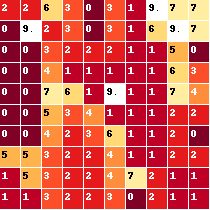

In [11]:
# Step 4
world, num = step(world, size)
print(num)
assert num == 16
draw_world(world, size, scale=21)

### Animate

#### Warning! You need Imagemagick installed for the next step.

Continue to "Solution part one" if you are not interested in the animation.

In [12]:
world, size = load_input('11-sample.txt')
for frame in range(100):
    img = draw_world(world, size, scale=20)
    img.save(f'anim{frame:04}.png')
    world, _ = step(world, size)

In [13]:
!convert -delay 12 anim*.png dumboctopus_world.gif
!rm anim*.png

![Animated octopusworld](dumboctopus_world.gif)

### Solution part one

In [14]:
def solution_one(filename, iterations=10):
    world, size = load_input(filename)
    acc = 0
    for frame in range(iterations):
        world, num_flashes = step(world, size)
        acc += num_flashes
    return acc

assert solution_one('11-sample.txt', iterations=100) == 1656

In [15]:
sol = solution_one('11-input.txt', iterations=100)
print(f"Solution of part one is: {sol}")

Solution of part one is: 1694


## Part two

In [16]:
world, size = load_input('11-sample.txt')
for i in range(195):
    world, num_flashes = step(world, size)   
assert num_flashes == 100

In [17]:
world, size = load_input('11-input.txt')
num_flashes = -1
num_steps = 0
while num_flashes != 100:
    world, num_flashes = step(world, size)
    num_steps += 1
print(f"Solution of part one is: {num_steps}")

Solution of part one is: 346


## Extra

In [18]:
world, size = load_input('11-input.txt')
for frame in range(347):
    img = draw_world(world, size, scale=18)
    img.save(f'sol{frame:04}.png')
    world, _ = step(world, size)

In [19]:
!convert -delay 12 -loop 1 sol*.png final_solution.gif
!rm sol*.png

![Final solution](final_solution.gif)